In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
events = pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\open-data-master\data\events\18242.json')

In [210]:
del events['timestamp']

In [211]:
type = events['type'].apply(pd.Series)
type.columns

Index(['id', 'name'], dtype='object')

In [212]:
del type['id']


In [213]:
type.columns = ['type']
type

,type
0,Starting XI
1,Starting XI
2,Half Start
3,Half Start
4,Pass
...,...
3428,Goal Keeper
3429,Pass
3430,Ball Receipt*
3431,Half End


In [214]:

events=pd.concat([events.drop(['type'], axis=1), type], axis=1)

In [215]:
possession = events['possession_team'].apply(pd.Series)

In [216]:
del possession['id']

In [217]:
possession.columns = ['possession_team']

In [218]:
events=pd.concat([events.drop(['possession_team'], axis=1), possession], axis=1)

In [219]:
event_team = events['team'].apply(pd.Series)
del event_team['id']
event_team.columns = ['event team']
events=pd.concat([events.drop(['team'], axis=1), event_team], axis=1)

In [220]:
del events['tactics']

In [221]:
player_name = events['player'].apply(pd.Series)
del player_name[0]


In [222]:
player_name.columns = ['player_id','player_name']
events=pd.concat([events.drop(['player'], axis=1), player_name], axis=1)

In [223]:
play_pattern = events['play_pattern'].apply(pd.Series)
del play_pattern['id']
play_pattern.columns = ['play_pattern']
events=pd.concat([events.drop(['play_pattern'], axis=1), play_pattern], axis=1)

In [224]:
event_position = events['position'].apply(pd.Series)
del event_position['id']
del event_position[0]
event_position.columns = ['event_position']
events=pd.concat([events.drop(['position'], axis=1), event_position], axis=1)

In [225]:
position = events['location'].apply(pd.Series)
position.columns = ['x1' , 'y1']
events=pd.concat([events.drop(['location'], axis=1), position], axis=1)

In [226]:
ball_receipt = events['ball_receipt'].apply(pd.Series)
del ball_receipt[0]
ball_receipt = ball_receipt['outcome'].apply(pd.Series)
del ball_receipt[0]
del ball_receipt['id']
ball_receipt.columns = ['ball_receipt']

In [227]:
events=pd.concat([events.drop(['ball_receipt'], axis=1), ball_receipt], axis=1)

In [228]:
recipient = events['pass'].apply(pd.Series)

In [229]:
outcome  = recipient['outcome'].apply(pd.Series)

In [230]:
del outcome[0]
del outcome['id']
outcome.columns = ['pass_outcome']

In [231]:
del recipient[0]
del recipient['aerial_won']
del recipient['assisted_shot_id']
del recipient['backheel']
del recipient['body_part']
del recipient['cross']


In [232]:
del recipient['height']
del recipient['miscommunication']
del recipient['outcome']
del recipient['shot_assist']
del recipient['switch']
del recipient['technique']
del recipient['type']

In [233]:
recipient

,angle,end_location,goal_assist,length,recipient,through_ball
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,2.034444,"[59.0, 42.0]",NaN,2.236068,"{'id': 8206, 'name': 'Arturo Erasmo Vidal Pardo'}",NaN
...,...,...,...,...,...,...
3428,NaN,NaN,NaN,NaN,NaN,NaN
3429,-1.570796,"[61.0, 37.0]",NaN,4.000000,"{'id': 3486, 'name': 'Fernando Llorente Torres'}",NaN
3430,NaN,NaN,NaN,NaN,NaN,NaN
3431,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
recipient = pd.concat([recipient.drop(['end_location'], axis=1), recipient['end_location'].apply(pd.Series)], axis=1)

In [235]:
recipient =  pd.concat([recipient.drop(['recipient'], axis=1), recipient['recipient'].apply(pd.Series)], axis=1)

In [236]:

del recipient['id']


In [237]:
recipient.columns = ['pass_angle', 'goal_assist', 'pass_length', 'through_ball', 'x2', 'y2', 0,'pass_recipient']

In [238]:
del recipient[0]

In [239]:
recipient =  pd.concat([recipient, outcome], axis=1)

In [240]:
events  = pd.concat([events, recipient], axis=1)

In [241]:
del events['pass']

In [242]:
pd.set_option('display.max_columns', None)

In [243]:
del events['carry']
del events['counterpress']
del events['under_pressure']
del events['off_camera']
del events['shot']
del events['goalkeeper']
del events['duel']
del events['dribble']
del events['ball_recovery']
del events['foul_won']
del events['foul_committed']
del events['interception']
del events['clearance']
del events['injury_stoppage']

In [244]:
del events['substitution']

In [250]:
events =events[['id', 'index', 'period', 'minute', 'second', 'possession', 'duration', 'player_name',  'x1', 'y1', 'pass_recipient',  'x2', 'y2',  'pass_outcome',
       'related_events', 'type', 'possession_team', 'event team', 'player_id',
        'play_pattern', 'event_position',
       'ball_receipt', 'pass_angle', 'goal_assist', 'pass_length',
       'through_ball']]

In [2]:
competitions = pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\open-data-master\data\competitions.json')

In [258]:
events.to_csv('passes_14-15ucl_final.csv', index = False)

In [545]:
events=pd.read_csv('passes_14-15ucl_final.csv')

In [546]:
pass_network = events[['index','period','minute','second','possession','player_name','x1','y1','pass_recipient','x2','y2','pass_outcome','event team','type','pass_angle','pass_length']]

In [547]:
pass_network=pass_network.loc[(pass_network['type']=='Pass')|(pass_network['type']=='Substitution')]

In [548]:
pass_network['pass_outcome'] = pass_network['pass_outcome'].fillna('Successful')

In [549]:
pass_network = pass_network.loc[pass_network['pass_outcome']=='Successful']

In [550]:
firstSub=pass_network[pass_network['type']=='Substitution']['minute'].min()


In [551]:
barca = pass_network[pass_network['event team']=='Barcelona']

In [552]:
barca = barca[barca['minute']<firstSub]

In [553]:
average_locations = barca.groupby('player_name').agg({'x1':['mean'],'y1':['mean','count']})

In [554]:
average_locations.columns = ['x1','y1','count']

In [555]:
average_locations

,x1,y1,count
player_name,,,
Andrés Iniesta Luján,73.840000,22.380000,50
Daniel Alves da Silva,64.305556,70.944444,72
Gerard Piqué Bernabéu,37.625000,54.531250,32
Ivan Rakitić,71.925000,58.350000,40
Javier Alejandro Mascherano,44.166667,30.611111,36
Jordi Alba Ramos,63.112903,14.032258,62
Lionel Andrés Messi Cuccittini,79.588235,53.686275,51
Luis Alberto Suárez Díaz,74.444444,45.611111,18
Marc-André ter Stegen,9.588235,43.235294,17


In [556]:
pass_between = barca.groupby(['player_name','pass_recipient']).index.count().reset_index()

In [557]:
pass_between.columns = ['player_name','pass_recipient','pass_counts']

In [558]:
pass_between = pass_between.merge(average_locations, left_on = 'player_name', right_index = True)
pass_between = pass_between.merge(average_locations, left_on = 'pass_recipient', right_index = True, suffixes=['', '_end'])

In [562]:
pass_between = pass_between[pass_between['pass_counts']>2]

In [563]:
pass_between 

,player_name,pass_recipient,pass_counts,x1,y1,count,x1_end,y1_end,count_end
0,Andrés Iniesta Luján,Daniel Alves da Silva,3,73.840000,22.380000,50,64.305556,70.944444,72
1,Gerard Piqué Bernabéu,Daniel Alves da Silva,12,37.625000,54.531250,32,64.305556,70.944444,72
2,Ivan Rakitić,Daniel Alves da Silva,15,71.925000,58.350000,40,64.305556,70.944444,72
3,Javier Alejandro Mascherano,Daniel Alves da Silva,7,44.166667,30.611111,36,64.305556,70.944444,72
5,Lionel Andrés Messi Cuccittini,Daniel Alves da Silva,10,79.588235,53.686275,51,64.305556,70.944444,72
6,Luis Alberto Suárez Díaz,Daniel Alves da Silva,4,74.444444,45.611111,18,64.305556,70.944444,72
7,Marc-André ter Stegen,Daniel Alves da Silva,3,9.588235,43.235294,17,64.305556,70.944444,72
8,Neymar da Silva Santos Junior,Daniel Alves da Silva,3,84.647059,21.617647,34,64.305556,70.944444,72
9,Sergio Busquets i Burgos,Daniel Alves da Silva,10,60.736842,41.438596,57,64.305556,70.944444,72
11,Daniel Alves da Silva,Gerard Piqué Bernabéu,6,64.305556,70.944444,72,37.625000,54.531250,32


In [564]:
pass_between.index = np.arange(0,len(pass_between),1)
pass_between

,player_name,pass_recipient,pass_counts,x1,y1,count,x1_end,y1_end,count_end
0,Andrés Iniesta Luján,Daniel Alves da Silva,3,73.840000,22.380000,50,64.305556,70.944444,72
1,Gerard Piqué Bernabéu,Daniel Alves da Silva,12,37.625000,54.531250,32,64.305556,70.944444,72
2,Ivan Rakitić,Daniel Alves da Silva,15,71.925000,58.350000,40,64.305556,70.944444,72
3,Javier Alejandro Mascherano,Daniel Alves da Silva,7,44.166667,30.611111,36,64.305556,70.944444,72
4,Lionel Andrés Messi Cuccittini,Daniel Alves da Silva,10,79.588235,53.686275,51,64.305556,70.944444,72
5,Luis Alberto Suárez Díaz,Daniel Alves da Silva,4,74.444444,45.611111,18,64.305556,70.944444,72
6,Marc-André ter Stegen,Daniel Alves da Silva,3,9.588235,43.235294,17,64.305556,70.944444,72
7,Neymar da Silva Santos Junior,Daniel Alves da Silva,3,84.647059,21.617647,34,64.305556,70.944444,72
8,Sergio Busquets i Burgos,Daniel Alves da Silva,10,60.736842,41.438596,57,64.305556,70.944444,72
9,Daniel Alves da Silva,Gerard Piqué Bernabéu,6,64.305556,70.944444,72,37.625000,54.531250,32


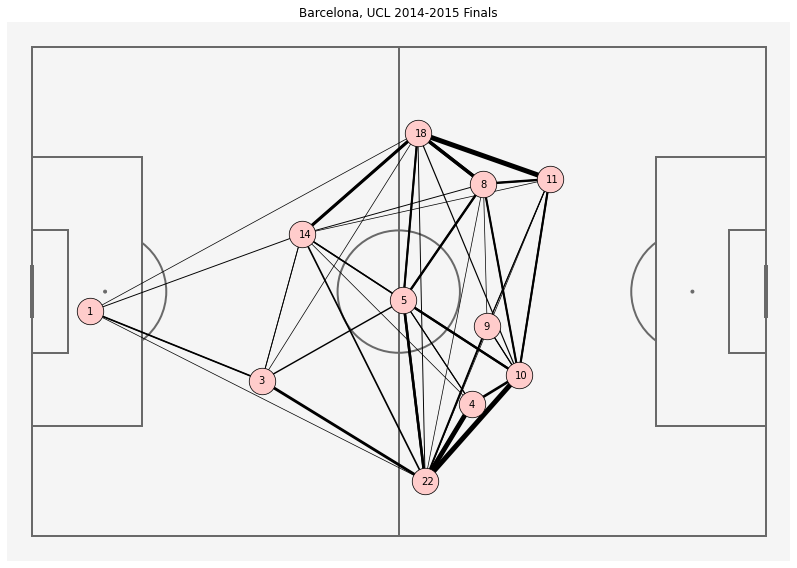

In [568]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#f5f5f5', line_color='#696969',
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw(figsize=(13.5, 8))

#plot the arrows

# arrows = pitch.arrows(pass_between.x1,pass_between.y1,pass_between.x1_end,pass_between.y1_end,
#                      width = 2, headwidth = 8, color = 'w',ax=ax, zorder = 2, alpha = 0.8)

#plot the nodes

# nodes = ax.scatter(average_locations.x1,average_locations.y1,
#                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1)
for i in range(len(pass_between)):
    plt.plot([pass_between['x1'][i],pass_between['x1_end'][i]],[pass_between['y1'][i],pass_between['y1_end'][i]], color ='black', linewidth=pass_between.pass_counts[i]*5/pass_between.pass_counts.max(),zorder=1)
#       plt.arrow(pass_between['x1'][i], pass_between['y1'][i],(pass_between['x1_end'][i]-pass_between['x1'][i])*0.87,(pass_between['y1_end'][i]-pass_between['y1'][i])*0.87, head_width=1 )             
               
               
sns.scatterplot(data = average_locations, x= 'x1', y='y1', s=700,  legend = False,edgecolor='black', zorder=2, color='#ffcccb')
#make annotation

txt = ['8','22','3','4','14','18','10','9','1','11','5']

for i, tx in enumerate(txt):
    ax.annotate(tx, (average_locations['x1'][i]-0.55,average_locations['y1'][i]+0.5))

plt.title('Barcelona, UCL 2014-2015 Finals')
plt.savefig('Vanilla_network.png')
    

In [569]:
juve = pass_network[pass_network['event team']=='Juventus']
juve = juve[juve['minute']<firstSub]
average_locations = juve.groupby('player_name').agg({'x1':['mean'],'y1':['mean','count']})
average_locations.columns = ['x1','y1','count']
pass_between = juve.groupby(['player_name','pass_recipient']).index.count().reset_index()
pass_between.columns = ['player_name','pass_recipient','pass_counts']
pass_between = pass_between.merge(average_locations, left_on = 'player_name', right_index = True)
pass_between = pass_between.merge(average_locations, left_on = 'pass_recipient', right_index = True, suffixes=['', '_end'])
pass_between = pass_between[pass_between['pass_counts']>2]
pass_between.index = np.arange(0,len(pass_between),1)


In [571]:
average_locations

,x1,y1,count
player_name,,,
Andrea Barzagli,45.136364,50.590909,22
Andrea Pirlo,52.750000,37.944444,36
Arturo Erasmo Vidal Pardo,65.838710,54.064516,31
Carlos Alberto Tevez,68.411765,34.941176,17
Claudio Marchisio,56.500000,48.227273,22
Gianluigi Buffon,8.789474,41.473684,19
Leonardo Bonucci,39.680000,27.680000,25
Patrice Evra,76.066667,9.933333,15
Paul Pogba,68.200000,26.950000,20


In [572]:
pass_between

,player_name,pass_recipient,pass_counts,x1,y1,count,x1_end,y1_end,count_end
0,Andrea Barzagli,Andrea Pirlo,4,45.136364,50.590909,22,52.750000,37.944444,36
1,Arturo Erasmo Vidal Pardo,Andrea Pirlo,8,65.838710,54.064516,31,52.750000,37.944444,36
2,Carlos Alberto Tevez,Andrea Pirlo,3,68.411765,34.941176,17,52.750000,37.944444,36
3,Claudio Marchisio,Andrea Pirlo,6,56.500000,48.227273,22,52.750000,37.944444,36
4,Gianluigi Buffon,Andrea Pirlo,3,8.789474,41.473684,19,52.750000,37.944444,36
5,Leonardo Bonucci,Andrea Pirlo,3,39.680000,27.680000,25,52.750000,37.944444,36
6,Paul Pogba,Andrea Pirlo,3,68.200000,26.950000,20,52.750000,37.944444,36
7,Stephan Lichtsteiner,Andrea Pirlo,3,48.227273,72.772727,22,52.750000,37.944444,36
8,Andrea Pirlo,Arturo Erasmo Vidal Pardo,4,52.750000,37.944444,36,65.838710,54.064516,31
9,Carlos Alberto Tevez,Arturo Erasmo Vidal Pardo,3,68.411765,34.941176,17,65.838710,54.064516,31


Text(0.5, 1.0, 'Juventus, UCL 2014-2015 Finals')

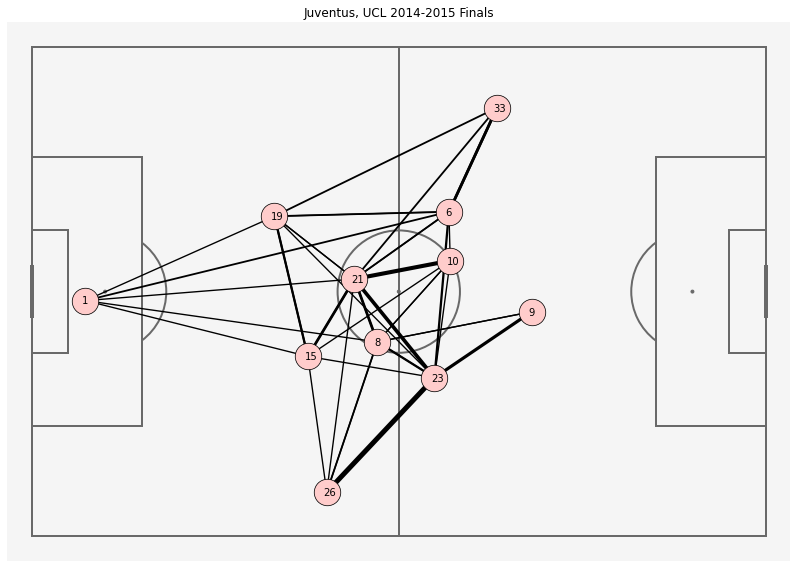

In [573]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#f5f5f5', line_color='#696969',
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw(figsize=(13.5, 8))

#plot the arrows

# arrows = pitch.arrows(pass_between.x1,pass_between.y1,pass_between.x1_end,pass_between.y1_end,
#                      width = 2, headwidth = 8, color = 'w',ax=ax, zorder = 2, alpha = 0.8)

#plot the nodes

# nodes = ax.scatter(average_locations.x1,average_locations.y1,
#                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1)
for i in range(len(pass_between)):
    plt.plot([pass_between['x1'][i],pass_between['x1_end'][i]],[pass_between['y1'][i],pass_between['y1_end'][i]], color ='black', linewidth=pass_between.pass_counts[i]*5/pass_between.pass_counts.max(),zorder=1)
#       plt.arrow(pass_between['x1'][i], pass_between['y1'][i],(pass_between['x1_end'][i]-pass_between['x1'][i])*0.87,(pass_between['y1_end'][i]-pass_between['y1'][i])*0.87, head_width=1 )             
               
               
sns.scatterplot(data = average_locations, x= 'x1', y='y1', s=700,  legend = False,edgecolor='black', zorder=2, color='#ffcccb')
#make annotation

txt = ['15','21','23','10','8','1','19','33','6','26','9']

for i, tx in enumerate(txt):
    ax.annotate(tx, (average_locations['x1'][i]-0.55,average_locations['y1'][i]+0.5))

plt.title('Juventus, UCL 2014-2015 Finals')

## Using Expected Threat to characterize pass networks


In [86]:
events = pd.read_csv('passes_14-15ucl_final.csv')

In [87]:
events

,id,index,period,minute,second,possession,duration,player_name,x1,y1,...,possession_team,event team,player_id,play_pattern,event_position,ball_receipt,pass_angle,goal_assist,pass_length,through_ball
0,909010e7-ef6c-4a0d-b314-abfad5659cd5,1,1,0,0,1,0.000000,NaN,NaN,NaN,...,Juventus,Juventus,NaN,Regular Play,NaN,NaN,NaN,NaN,NaN,NaN
1,ae41ae3a-46d6-4dc2-a135-25bcbb5b3abd,2,1,0,0,1,0.000000,NaN,NaN,NaN,...,Juventus,Barcelona,NaN,Regular Play,NaN,NaN,NaN,NaN,NaN,NaN
2,6b3a74c6-b09e-4e74-a628-9dce9aee1ac7,3,1,0,0,1,0.000000,NaN,NaN,NaN,...,Juventus,Juventus,NaN,Regular Play,NaN,NaN,NaN,NaN,NaN,NaN
3,dd747f4e-e94f-442c-8d5f-5e040a59673a,4,1,0,0,1,0.000000,NaN,NaN,NaN,...,Juventus,Barcelona,NaN,Regular Play,NaN,NaN,NaN,NaN,NaN,NaN
4,62735291-870b-4d34-9fd8-78dca3df9b09,5,1,0,1,2,0.300656,Carlos Alberto Tevez,60.0,40.0,...,Juventus,Juventus,20666.0,From Kick Off,Right Center Forward,NaN,2.034444,NaN,2.236068,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,d7d27f45-8ff1-4d12-93ee-7eafdd12d79b,3429,2,96,41,194,0.000000,Gianluigi Buffon,6.0,44.0,...,Barcelona,Juventus,6949.0,Regular Play,Goalkeeper,NaN,NaN,NaN,NaN,NaN
3429,1ce9d5b5-2a94-43ea-bbd6-6f45d7d0c513,3430,2,96,44,195,0.200000,Carlos Alberto Tevez,61.0,41.0,...,Juventus,Juventus,20666.0,From Kick Off,Right Center Forward,NaN,-1.570796,NaN,4.000000,NaN
3430,c4f5f728-2695-4671-833d-d8857108c89a,3431,2,96,45,195,NaN,Fernando Llorente Torres,61.0,37.0,...,Juventus,Juventus,3486.0,From Kick Off,Left Center Forward,NaN,NaN,NaN,NaN,NaN
3431,83ef287d-b89d-43e0-a98f-2d3dfaad4d87,3432,2,96,55,195,0.000000,NaN,NaN,NaN,...,Juventus,Barcelona,NaN,From Kick Off,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
pass_network_xT = events[['index','period','minute','second','possession','player_name','x1','y1','pass_recipient','x2','y2','pass_outcome','event team','type','pass_angle','pass_length']]

In [89]:
pass_network_xT = pass_network_xT.loc[(pass_network_xT['type']=='Pass')|(pass_network_xT['type']=='Substitution')]

In [90]:
firstSub = pass_network_xT[pass_network_xT['type']=='Substitution']['minute'].min()

In [91]:
pass_network_xT['pass_outcome']=pass_network_xT['pass_outcome'].fillna('Successful')

In [92]:
pass_network_xT = pass_network_xT[(pass_network_xT['minute']<firstSub)&(pass_network_xT['pass_outcome']=='Successful')]

In [93]:
pass_network_xT.index=np.arange(0,len(pass_network_xT),1)
pass_network_xT

,index,period,minute,second,possession,player_name,x1,y1,pass_recipient,x2,y2,pass_outcome,event team,type,pass_angle,pass_length
0,5,1,0,1,2,Carlos Alberto Tevez,60.0,40.0,Arturo Erasmo Vidal Pardo,59.0,42.0,Successful,Juventus,Pass,2.034444,2.236068
1,8,1,0,2,2,Arturo Erasmo Vidal Pardo,58.0,42.0,Andrea Pirlo,48.0,40.0,Successful,Juventus,Pass,-2.944197,10.198039
2,11,1,0,3,2,Andrea Pirlo,37.0,37.0,Andrea Barzagli,31.0,39.0,Successful,Juventus,Pass,2.819842,6.324555
3,14,1,0,5,2,Andrea Barzagli,31.0,39.0,Leonardo Bonucci,31.0,21.0,Successful,Juventus,Pass,-1.570796,18.000000
4,17,1,0,8,2,Leonardo Bonucci,33.0,19.0,Paul Pogba,48.0,20.0,Successful,Juventus,Pass,0.066568,15.033297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2880,2,73,53,156,Paul Pogba,88.0,59.0,Arturo Erasmo Vidal Pardo,101.0,62.0,Successful,Juventus,Pass,0.226799,13.341664
704,2883,2,73,56,156,Arturo Erasmo Vidal Pardo,101.0,62.0,Claudio Marchisio,96.0,60.0,Successful,Juventus,Pass,-2.761086,5.385165
705,2898,2,74,51,159,Neymar da Silva Santos Junior,86.0,36.0,Jordi Alba Ramos,108.0,24.0,Successful,Barcelona,Pass,-0.499347,25.059929
706,2902,2,74,55,159,Jordi Alba Ramos,105.0,25.0,Neymar da Silva Santos Junior,99.0,30.0,Successful,Barcelona,Pass,2.446854,7.810250


In [94]:
x_divisions=np.linspace(0,120,21)
x_divisions=np.around(x_divisions,decimals=2)
y_divisions=np.linspace(0,80,16)
y_divisions=np.around(y_divisions,decimals=2)
zones = np.arange(0,((len(x_divisions)-1)*(len(y_divisions)-1)))
zones = np.reshape(zones,(20,15))
def assign_zone(x_coord,y_coord):
    for i in range(len(x_divisions)-1):
        if x_coord < x_divisions[i+1]:
            break
    for j in range(len(y_divisions)-1):
        if y_coord < y_divisions[j+1]:
            break
    return i, j

In [95]:
m = len(pass_network_xT)
zone1=np.zeros(m)
for i in range(m):
    a , b = assign_zone(pass_network_xT['x1'][i],pass_network_xT['y1'][i])
    zone1[i] = zones[a][b]

In [96]:
zone2=np.zeros(m)
for i in range(m):
    a , b = assign_zone(pass_network_xT['x2'][i],pass_network_xT['y2'][i])
    zone2[i] = zones[a][b]

In [97]:
with open('xT_matrix.npy', 'rb') as f:
    xT_matrix = np.load(f)

In [98]:
zone1= zone1.astype('int')
zone2 = zone2.astype('int')

In [99]:
xTzone1 = np.zeros(m)
xTzone2 = np.zeros(m)
xT_matrix = xT_matrix.flatten()
for i in range(m):
    temp1 = zone1[i]
    temp2 = zone2[i]
    xTzone1[i] = xT_matrix[temp1]
    xTzone2[i] = xT_matrix[temp2]

In [100]:
xTdiff =  xTzone2-xTzone1

In [101]:
pass_network_xT['xTdiff']=xTdiff
pass_network_xT['xTzone1']=xTzone1
pass_network_xT['xTzone2']=xTzone2


In [102]:
barca = pass_network_xT[(pass_network_xT['event team']=='Barcelona')&(pass_network_xT['minute']<firstSub)]

In [103]:
average_locations = barca.groupby('player_name').agg({'x1':['mean'],'y1':['mean','count'],'xTdiff':['sum']})

In [104]:
average_locations

x1         y1        xTdiff
                                     mean       mean count     sum
player_name                                                       
Andrés Iniesta Luján            73.840000  22.380000    50  0.3810
Daniel Alves da Silva           64.305556  70.944444    72  0.0612
Gerard Piqué Bernabéu           37.625000  54.531250    32  0.0287
Ivan Rakitić                    71.925000  58.350000    40  0.2011
Javier Alejandro Mascherano     44.166667  30.611111    36  0.0719
Jordi Alba Ramos                63.112903  14.032258    62  0.1538
Lionel Andrés Messi Cuccittini  79.588235  53.686275    51  0.4522
Luis Alberto Suárez Díaz        74.444444  45.611111    18 -0.0720
Marc-André ter Stegen            9.588235  43.235294    17  0.0031
Neymar da Silva Santos Junior   84.647059  21.617647    34  0.6429
Sergio Busquets i Burgos        60.736842  41.438596    57  0.0659

In [105]:
average_locations.columns = ['x1','y1','count','xTdiff']

In [106]:
pass_between=barca.groupby(['player_name','pass_recipient']).xTdiff.sum().reset_index()

In [107]:
pass_between.columns = ['player_name','pass_recipient','xT_diff']

In [108]:
pass_between = pass_between.merge(average_locations, left_on = 'player_name', right_index = True)
pass_between = pass_between.merge(average_locations, left_on = 'pass_recipient', right_index = True, suffixes=['', '_end'])

In [109]:
pass_between.to_csv('pass_between_barca.csv',index=False)
average_locations.to_csv('average_locations_barca.csv',index=False)

In [110]:
pass_between.loc[pass_between['xT_diff']<0, 'xT_diff']=0

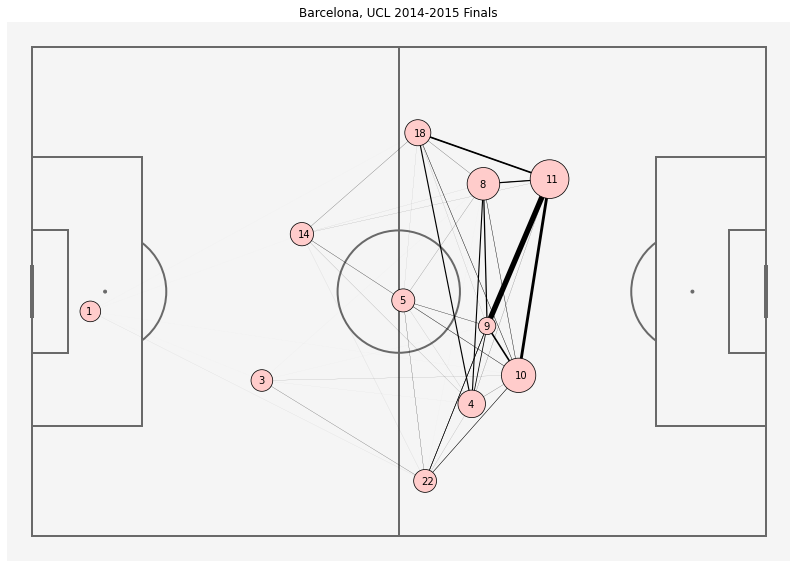

In [111]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#f5f5f5', line_color='#696969',
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw(figsize=(13.5, 8))

#plot the arrows

# arrows = pitch.arrows(pass_between.x1,pass_between.y1,pass_between.x1_end,pass_between.y1_end,
#                      width = 2, headwidth = 8, color = 'w',ax=ax, zorder = 2, alpha = 0.8)

#plot the nodes

# nodes = ax.scatter(average_locations.x1,average_locations.y1,
#                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1)
for i in range(len(pass_between)):
    plt.plot([pass_between['x1'][i],pass_between['x1_end'][i]],[pass_between['y1'][i],pass_between['y1_end'][i]], color ='black', linewidth=pass_between.xT_diff[i]*10,zorder=1)
#       plt.arrow(pass_between['x1'][i], pass_between['y1'][i],(pass_between['x1_end'][i]-pass_between['x1'][i])*0.87,(pass_between['y1_end'][i]-pass_between['y1'][i])*0.87, head_width=1 )             
               
               
sns.scatterplot(data = average_locations, x= 'x1', y='y1', size='xTdiff',sizes=(300,1500),  legend = False,edgecolor='black', zorder=2, color='#ffcccb')
#make annotation

txt = ['8','22','3','4','14','18','10','9','1','11','5']

for i, tx in enumerate(txt):
    ax.annotate(tx, (average_locations['x1'][i]-0.65,average_locations['y1'][i]+0.5))

plt.title('Barcelona, UCL 2014-2015 Finals')
plt.savefig('xT_network.png')

In [38]:
average_locations.xTdiff

player_name
Andrés Iniesta Luján              0.3810
Daniel Alves da Silva             0.0612
Gerard Piqué Bernabéu             0.0287
Ivan Rakitić                      0.2011
Javier Alejandro Mascherano       0.0719
Jordi Alba Ramos                  0.1538
Lionel Andrés Messi Cuccittini    0.4522
Luis Alberto Suárez Díaz         -0.0720
Marc-André ter Stegen             0.0031
Neymar da Silva Santos Junior     0.6429
Sergio Busquets i Burgos          0.0659
Name: xTdiff, dtype: float64

In [159]:
juve = pass_network_xT[(pass_network_xT['event team']=='Juventus')&(pass_network_xT['minute']<firstSub)]
average_locations = juve.groupby('player_name').agg({'x1':['mean'],'y1':['mean','count'],'xTdiff':['sum']})
average_locations.columns = ['x1','y1','count','xTdiff']
pass_between=juve.groupby(['player_name','pass_recipient']).xTdiff.sum().reset_index()
pass_between.columns = ['player_name','pass_recipient','xT_diff']
pass_between = pass_between.merge(average_locations, left_on = 'player_name', right_index = True)
pass_between = pass_between.merge(average_locations, left_on = 'pass_recipient', right_index = True, suffixes=['', '_end'])
pass_between.to_csv('pass_between_juve.csv', index = False)
average_locations.to_csv('average_locations_juve.csv', index = False)
pass_between.loc[pass_between['xT_diff']<0, 'xT_diff']=0


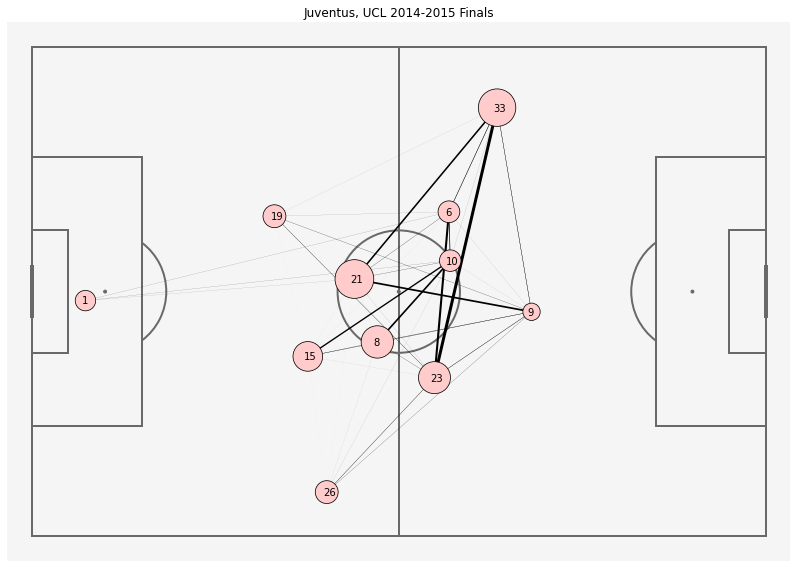

In [160]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#f5f5f5', line_color='#696969',
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw(figsize=(13.5, 8))

#plot the arrows

# arrows = pitch.arrows(pass_between.x1,pass_between.y1,pass_between.x1_end,pass_between.y1_end,
#                      width = 2, headwidth = 8, color = 'w',ax=ax, zorder = 2, alpha = 0.8)

#plot the nodes

# nodes = ax.scatter(average_locations.x1,average_locations.y1,
#                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1)
for i in range(len(pass_between)):
    plt.plot([pass_between['x1'][i],pass_between['x1_end'][i]],[pass_between['y1'][i],pass_between['y1_end'][i]], color ='black', linewidth=pass_between.xT_diff[i]*10,zorder=1)
#       plt.arrow(pass_between['x1'][i], pass_between['y1'][i],(pass_between['x1_end'][i]-pass_between['x1'][i])*0.87,(pass_between['y1_end'][i]-pass_between['y1'][i])*0.87, head_width=1 )             
               
               
sns.scatterplot(data = average_locations, x= 'x1', y='y1', size='xTdiff',sizes=(300,1500),  legend = False,edgecolor='black', zorder=2, color='#ffcccb')
#make annotation

txt = ['15','21','23','10','8','1','19','33','6','26','9']

for i, tx in enumerate(txt):
    ax.annotate(tx, (average_locations['x1'][i]-0.65,average_locations['y1'][i]+0.5))

plt.title('Juventus, UCL 2014-2015 Finals')
plt.savefig('xT_networkjuve.png')


## Waste of Possession 

In [180]:
pass_between=pd.read_csv('pass_between_barca.csv')
average_locations=pd.read_csv('average_locations_barca.csv')

In [181]:
pass_between

,player_name,pass_recipient,xT_diff,x1,y1,count,xTdiff,x1_end,y1_end,count_end,xTdiff_end
0,Andrés Iniesta Luján,Daniel Alves da Silva,-0.0088,73.840000,22.380000,50,0.3810,64.305556,70.944444,72,0.0612
1,Gerard Piqué Bernabéu,Daniel Alves da Silva,0.0183,37.625000,54.531250,32,0.0287,64.305556,70.944444,72,0.0612
2,Ivan Rakitić,Daniel Alves da Silva,0.0084,71.925000,58.350000,40,0.2011,64.305556,70.944444,72,0.0612
3,Javier Alejandro Mascherano,Daniel Alves da Silva,0.0039,44.166667,30.611111,36,0.0719,64.305556,70.944444,72,0.0612
4,Jordi Alba Ramos,Daniel Alves da Silva,-0.0014,63.112903,14.032258,62,0.1538,64.305556,70.944444,72,0.0612
...,...,...,...,...,...,...,...,...,...,...,...
84,Sergio Busquets i Burgos,Andrés Iniesta Luján,0.0138,60.736842,41.438596,57,0.0659,73.840000,22.380000,50,0.3810
85,Gerard Piqué Bernabéu,Marc-André ter Stegen,0.0007,37.625000,54.531250,32,0.0287,9.588235,43.235294,17,0.0031
86,Javier Alejandro Mascherano,Marc-André ter Stegen,0.0001,44.166667,30.611111,36,0.0719,9.588235,43.235294,17,0.0031
87,Jordi Alba Ramos,Marc-André ter Stegen,0.0004,63.112903,14.032258,62,0.1538,9.588235,43.235294,17,0.0031


In [182]:
pass_between['xT_diff']=pass_between['xT_diff']*-1

In [183]:
pass_between.loc[pass_between['xT_diff']<0, 'xT_diff']=0
pass_between

,player_name,pass_recipient,xT_diff,x1,y1,count,xTdiff,x1_end,y1_end,count_end,xTdiff_end
0,Andrés Iniesta Luján,Daniel Alves da Silva,0.0088,73.840000,22.380000,50,0.3810,64.305556,70.944444,72,0.0612
1,Gerard Piqué Bernabéu,Daniel Alves da Silva,0.0000,37.625000,54.531250,32,0.0287,64.305556,70.944444,72,0.0612
2,Ivan Rakitić,Daniel Alves da Silva,0.0000,71.925000,58.350000,40,0.2011,64.305556,70.944444,72,0.0612
3,Javier Alejandro Mascherano,Daniel Alves da Silva,0.0000,44.166667,30.611111,36,0.0719,64.305556,70.944444,72,0.0612
4,Jordi Alba Ramos,Daniel Alves da Silva,0.0014,63.112903,14.032258,62,0.1538,64.305556,70.944444,72,0.0612
...,...,...,...,...,...,...,...,...,...,...,...
84,Sergio Busquets i Burgos,Andrés Iniesta Luján,0.0000,60.736842,41.438596,57,0.0659,73.840000,22.380000,50,0.3810
85,Gerard Piqué Bernabéu,Marc-André ter Stegen,0.0000,37.625000,54.531250,32,0.0287,9.588235,43.235294,17,0.0031
86,Javier Alejandro Mascherano,Marc-André ter Stegen,0.0000,44.166667,30.611111,36,0.0719,9.588235,43.235294,17,0.0031
87,Jordi Alba Ramos,Marc-André ter Stegen,0.0000,63.112903,14.032258,62,0.1538,9.588235,43.235294,17,0.0031


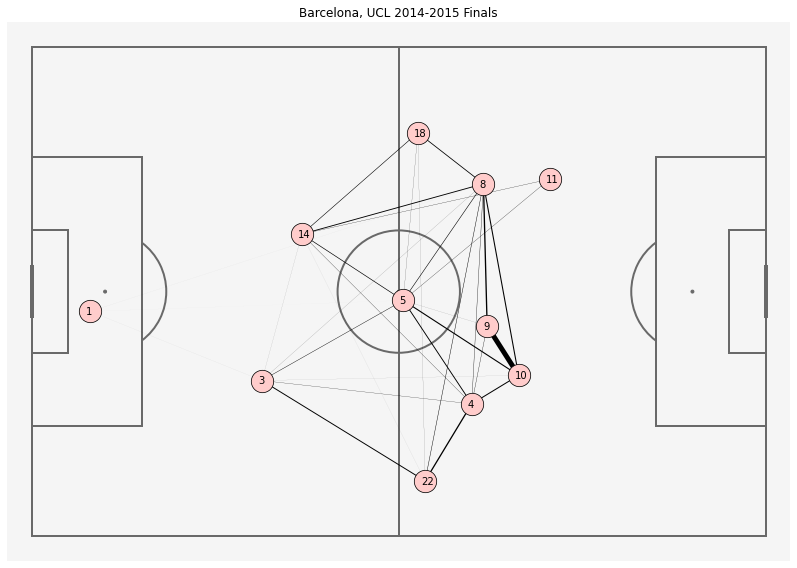

In [185]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#f5f5f5', line_color='#696969',
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw(figsize=(13.5, 8))

#plot the arrows

# arrows = pitch.arrows(pass_between.x1,pass_between.y1,pass_between.x1_end,pass_between.y1_end,
#                      width = 2, headwidth = 8, color = 'w',ax=ax, zorder = 2, alpha = 0.8)

#plot the nodes

# nodes = ax.scatter(average_locations.x1,average_locations.y1,
#                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1)
for i in range(len(pass_between)):
    plt.plot([pass_between['x1'][i],pass_between['x1_end'][i]],[pass_between['y1'][i],pass_between['y1_end'][i]], color ='black', linewidth=pass_between.xT_diff[i]*50,zorder=1)
#       plt.arrow(pass_between['x1'][i], pass_between['y1'][i],(pass_between['x1_end'][i]-pass_between['x1'][i])*0.87,(pass_between['y1_end'][i]-pass_between['y1'][i])*0.87, head_width=1 )             
               
               
sns.scatterplot(data = average_locations, x= 'x1', y='y1', s=500, legend = False,edgecolor='black', zorder=2, color='#ffcccb')
#make annotation

txt = ['8','22','3','4','14','18','10','9','1','11','5']

for i, tx in enumerate(txt):
    ax.annotate(tx, (average_locations['x1'][i]-0.65,average_locations['y1'][i]+0.5))

plt.title('Barcelona, UCL 2014-2015 Finals')
plt.savefig('xT_waste_network.png')

In [186]:
pass_between=pd.read_csv('pass_between_juve.csv')
average_locations=pd.read_csv('average_locations_juve.csv')

In [187]:
pass_between['xT_diff']=pass_between['xT_diff']*-1


In [188]:
pass_between.loc[pass_between['xT_diff']<0, 'xT_diff']=0
pass_between

,player_name,pass_recipient,xT_diff,x1,y1,count,xTdiff,x1_end,y1_end,count_end,xTdiff_end
0,Andrea Barzagli,Andrea Pirlo,0.000000e+00,45.136364,50.590909,22,0.1728,52.750000,37.944444,36,0.3721
1,Arturo Erasmo Vidal Pardo,Andrea Pirlo,1.320000e-02,65.838710,54.064516,31,0.2195,52.750000,37.944444,36,0.3721
2,Carlos Alberto Tevez,Andrea Pirlo,4.400000e-03,68.411765,34.941176,17,0.0391,52.750000,37.944444,36,0.3721
3,Claudio Marchisio,Andrea Pirlo,1.084202e-19,56.500000,48.227273,22,0.2265,52.750000,37.944444,36,0.3721
4,Gianluigi Buffon,Andrea Pirlo,0.000000e+00,8.789474,41.473684,19,0.0243,52.750000,37.944444,36,0.3721
...,...,...,...,...,...,...,...,...,...,...,...
80,Arturo Erasmo Vidal Pardo,Patrice Evra,0.000000e+00,65.838710,54.064516,31,0.2195,76.066667,9.933333,15,0.3411
81,Gianluigi Buffon,Patrice Evra,2.000000e-04,8.789474,41.473684,19,0.0243,76.066667,9.933333,15,0.3411
82,Leonardo Bonucci,Patrice Evra,0.000000e+00,39.680000,27.680000,25,0.0587,76.066667,9.933333,15,0.3411
83,Paul Pogba,Patrice Evra,0.000000e+00,68.200000,26.950000,20,0.0421,76.066667,9.933333,15,0.3411


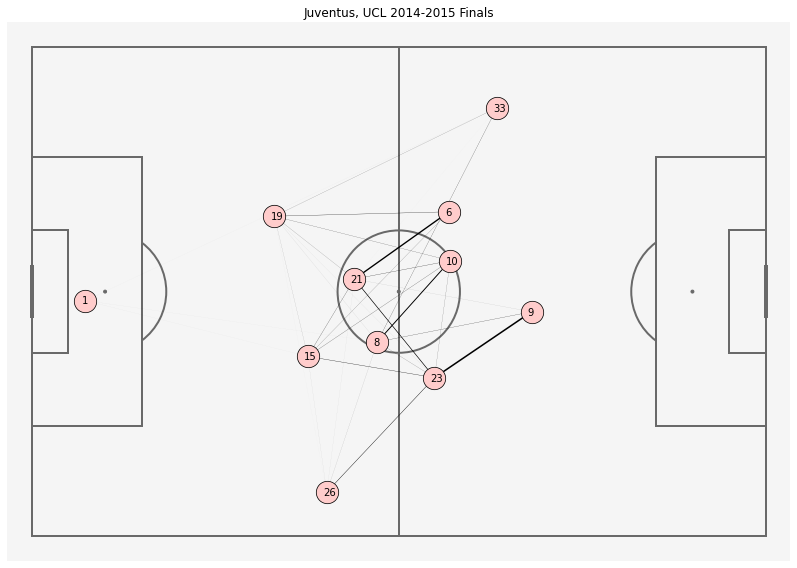

In [189]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#f5f5f5', line_color='#696969',
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw(figsize=(13.5, 8))

#plot the arrows

# arrows = pitch.arrows(pass_between.x1,pass_between.y1,pass_between.x1_end,pass_between.y1_end,
#                      width = 2, headwidth = 8, color = 'w',ax=ax, zorder = 2, alpha = 0.8)

#plot the nodes

# nodes = ax.scatter(average_locations.x1,average_locations.y1,
#                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1)
for i in range(len(pass_between)):
    plt.plot([pass_between['x1'][i],pass_between['x1_end'][i]],[pass_between['y1'][i],pass_between['y1_end'][i]], color ='black', linewidth=pass_between.xT_diff[i]*50,zorder=1)
#       plt.arrow(pass_between['x1'][i], pass_between['y1'][i],(pass_between['x1_end'][i]-pass_between['x1'][i])*0.87,(pass_between['y1_end'][i]-pass_between['y1'][i])*0.87, head_width=1 )             
               
               
sns.scatterplot(data = average_locations, x= 'x1', y='y1',s=500,  legend = False,edgecolor='black', zorder=2, color='#ffcccb')
#make annotation

txt = ['15','21','23','10','8','1','19','33','6','26','9']

for i, tx in enumerate(txt):
    ax.annotate(tx, (average_locations['x1'][i]-0.65,average_locations['y1'][i]+0.5))

plt.title('Juventus, UCL 2014-2015 Finals')
plt.savefig('xT_networkjuve.png')
